## Bubble Plot

In [12]:
# import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# import csv
city_data_complete = 'city_data.csv'
ride_data_complete = 'ride_data.csv'

In [65]:
# turn csv to df
city_data_df = pd.read_csv(city_data_complete)
ride_data_df = pd.read_csv(ride_data_complete)

In [66]:
# look at data
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [67]:
# reindex by city
city_data_df = city_data_df.set_index('city')
city_organized_df = city_data_df.sort_index()
city_organized_df.head()
city_organized_df = city_organized_df.reset_index()

In [68]:
# look at data
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [69]:
# reindex by city
ride_data_df = ride_data_df.set_index('city')
ride_organized_df = ride_data_df.sort_index()
ride_organized_df.head()

,date,fare,ride_id
city,,,
Alvarezhaven,2016-08-01 00:39:48,6.42,8394540350728
Alvarezhaven,2016-01-21 07:25:48,22.83,3565582370530
Alvarezhaven,2016-06-21 09:57:52,20.88,9456788060940
Alvarezhaven,2016-05-16 15:33:14,6.45,8939751998750
Alvarezhaven,2016-06-25 22:46:06,24.16,9047320468692


In [70]:
# ride count per city
ride_counts = ride_organized_df.groupby('city').count()
ride_counts.head()

,date,fare,ride_id
city,,,
Alvarezhaven,31,31,31
Alyssaberg,26,26,26
Anitamouth,9,9,9
Antoniomouth,22,22,22
Aprilchester,19,19,19


In [71]:
# fare total per city
total_fare = ride_organized_df.groupby('city').sum()
total_fare.head()

,fare,ride_id
city,,
Alvarezhaven,741.79,165899161874789
Alyssaberg,535.85,91953627077845
Anitamouth,335.84,37762826439863
Antoniomouth,519.75,111909606921566
Aprilchester,417.65,86920968698689


In [72]:
# delete unnecessary columns
del total_fare['ride_id']
del ride_counts['date']
del ride_counts['fare']

In [73]:
# look at df
total_fare.head()
total_fare = total_fare.reset_index()


In [74]:
# look at df
ride_counts.head()
ride_counts = ride_counts.reset_index()

In [75]:
# merge all df
merged_df = pd.merge(city_organized_df, total_fare, on='city', how='outer')

In [76]:
# look merged
merged_df.head()

,city,driver_count,type,fare
0,Alvarezhaven,21,Urban,741.79
1,Alyssaberg,67,Urban,535.85
2,Anitamouth,16,Suburban,335.84
3,Antoniomouth,21,Urban,519.75
4,Aprilchester,49,Urban,417.65


In [77]:
# merge last df
merged_df = pd.merge(merged_df, ride_counts, on='city', how='outer')

In [79]:
# look at final merge
merged_df.head()

,city,driver_count,type,fare,ride_id
0,Alvarezhaven,21,Urban,741.79,31
1,Alyssaberg,67,Urban,535.85,26
2,Anitamouth,16,Suburban,335.84,9
3,Antoniomouth,21,Urban,519.75,22
4,Aprilchester,49,Urban,417.65,19


In [80]:
# calculate and create average fare in df
merged_df['average_fare'] = merged_df['fare'] / merged_df['ride_id']
merged_df.head()

,city,driver_count,type,fare,ride_id,average_fare
0,Alvarezhaven,21,Urban,741.79,31,23.928710
1,Alyssaberg,67,Urban,535.85,26,20.609615
2,Anitamouth,16,Suburban,335.84,9,37.315556
3,Antoniomouth,21,Urban,519.75,22,23.625000
4,Aprilchester,49,Urban,417.65,19,21.981579


In [81]:
# seperate Urban data
urban_data = merged_df.loc[merged_df['type'] == 'Urban', :]

urban_data.head()

,city,driver_count,type,fare,ride_id,average_fare
0,Alvarezhaven,21,Urban,741.79,31,23.928710
1,Alyssaberg,67,Urban,535.85,26,20.609615
3,Antoniomouth,21,Urban,519.75,22,23.625000
4,Aprilchester,49,Urban,417.65,19,21.981579
5,Arnoldview,41,Urban,778.30,31,25.106452


In [83]:
# seperate Suburban data
suburban_data = merged_df.loc[merged_df['type'] == 'Suburban', :]

suburban_data.head()

,city,driver_count,type,fare,ride_id,average_fare
2,Anitamouth,16,Suburban,335.84,9,37.315556
6,Campbellport,26,Suburban,505.67,15,33.711333
7,Carrollbury,4,Suburban,366.06,10,36.606000
9,Clarkstad,21,Suburban,372.62,12,31.051667
10,Conwaymouth,18,Suburban,380.51,11,34.591818


In [84]:
# seperate Rural data
rural_data = merged_df.loc[merged_df['type'] == 'Rural', :]

rural_data.head()

,city,driver_count,type,fare,ride_id,average_fare
17,East Leslie,9,Rural,370.27,11,33.660909
18,East Stephen,6,Rural,390.53,10,39.053000
19,East Troybury,3,Rural,232.71,7,33.244286
21,Erikport,3,Rural,240.35,8,30.043750
25,Hernandezshire,10,Rural,288.02,9,32.002222


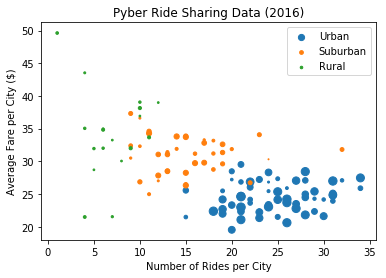

In [121]:
#  SCATTRT PLOT
plt.scatter(urban_data['ride_id'], urban_data['average_fare'], s = urban_data['driver_count'],marker = 'o',label = 'Urban')
plt.scatter(suburban_data['ride_id'], suburban_data['average_fare'], s = suburban_data['driver_count'],marker = 'o',label = 'Suburban')
plt.scatter(rural_data['ride_id'], rural_data['average_fare'], s = rural_data['driver_count'],marker = 'o',label = 'Rural')

plt.title('Pyber Ride Sharing Data (2016)')

plt.xlabel('Number of Rides per City')

plt.ylabel('Average Fare per City ($)')

plt.legend(loc='best')

plt.show()

## Total Fares by City Type (Pie Chart 1)

In [89]:
merged_df.head()

,city,driver_count,type,fare,ride_id,average_fare
0,Alvarezhaven,21,Urban,741.79,31,23.928710
1,Alyssaberg,67,Urban,535.85,26,20.609615
2,Anitamouth,16,Suburban,335.84,9,37.315556
3,Antoniomouth,21,Urban,519.75,22,23.625000
4,Aprilchester,49,Urban,417.65,19,21.981579


In [96]:
total_fare_by_type = merged_df.groupby('type').sum()
total_fare_by_type


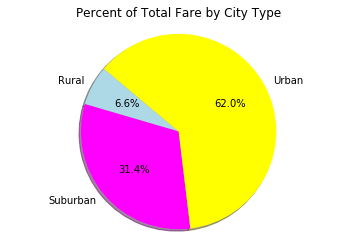

In [116]:
labels = ['Rural', 'Suburban', 'Urban']

size = total_fare_by_type['fare'].values.tolist()

colors = ['lightblue', 'magenta', 'yellow']

plt.pie(size, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title('Percent of Total Fare by City Type')

plt.show()

## Total Rides by City Type (Pie Chart 2)

In [102]:
merged_df.head()

,city,driver_count,type,fare,ride_id,average_fare
0,Alvarezhaven,21,Urban,741.79,31,23.928710
1,Alyssaberg,67,Urban,535.85,26,20.609615
2,Anitamouth,16,Suburban,335.84,9,37.315556
3,Antoniomouth,21,Urban,519.75,22,23.625000
4,Aprilchester,49,Urban,417.65,19,21.981579


In [105]:
total_rides_by_type = merged_df.groupby('type').sum()
total_rides_by_type

,driver_count,fare,ride_id,average_fare
type,,,,
Rural,104,4255.09,125,615.728572
Suburban,638,20335.69,657,1300.433953
Urban,2607,40078.34,1625,1623.863390


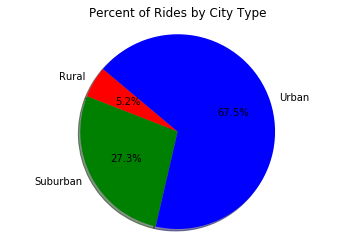

In [117]:
labels = ['Rural', 'Suburban', 'Urban']

size = total_rides_by_type['ride_id'].values.tolist()

colors = ['red', 'green', 'blue']

plt.pie(size, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title('Percent of Rides by City Type')

plt.show()

## Total Drivers by City Type (Pie Chart 3)

In [108]:
merged_df.head()

,city,driver_count,type,fare,ride_id,average_fare
0,Alvarezhaven,21,Urban,741.79,31,23.928710
1,Alyssaberg,67,Urban,535.85,26,20.609615
2,Anitamouth,16,Suburban,335.84,9,37.315556
3,Antoniomouth,21,Urban,519.75,22,23.625000
4,Aprilchester,49,Urban,417.65,19,21.981579


In [111]:
total_drivers_by_type = merged_df.groupby('type').sum()
total_drivers_by_type

,driver_count,fare,ride_id,average_fare
type,,,,
Rural,104,4255.09,125,615.728572
Suburban,638,20335.69,657,1300.433953
Urban,2607,40078.34,1625,1623.863390


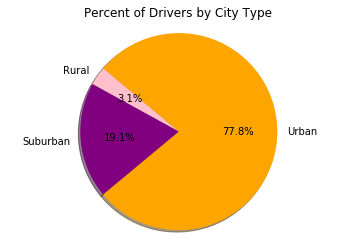

In [118]:
labels = ['Rural', 'Suburban', 'Urban']

size = total_drivers_by_type['driver_count'].values.tolist()

colors = ['pink', 'purple', 'orange']

plt.pie(size, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title('Percent of Drivers by City Type')

plt.show()